In [1]:
import matplotlib.pyplot as plt

In [ ]:
#GlcA_deprot
rmsd_file = open("/home/oriol/Oriol/GH_A/3_glca_deprot/clas_deprot/rmsd_deprot.dat", "r")

In [ ]:
#new protonation state
rmsd_file = open("/home/oriol/Oriol/GH_A/4_new_prot_state/rmsd_newprot.dat", "r")

In [3]:
#His241_deprot
rmsd_file = open("/home/oriol/Oriol/GH_A/5_his241_deprot/rmsd_deprot.dat", "r")

In [28]:
#21 without 6 last residues
rmsd_file = open("/home/oriol/Oriol/GH_A/21_E45deprot_19/rmsd_notail.dat", "r")

In [29]:
#21
rmsd_file2 = open("/home/oriol/Oriol/GH_A/21_E45deprot_19/rmsd_deprot.dat", "r")

In [4]:
#27
rmsd_file = open("/home/oriol/Oriol/GH_A/27_restraint21/rmsd_deprot.dat", "r")

In [5]:
m = ""
m = rmsd_file.readline()
rmsd_dict = {}
while m:
    frame,rmsd_value = m.split("\t")
    rmsd_dict[int(frame)] = float(rmsd_value[:-1]) #float?
    m = rmsd_file.readline()

In [31]:
m2 = ""
m2 = rmsd_file2.readline()
rmsd_dict2 = {}
while m2:
    frame,rmsd_value2 = m2.split("\t")
    rmsd_dict2[int(frame)] = float(rmsd_value2[:-1]) #float?
    m2 = rmsd_file2.readline()

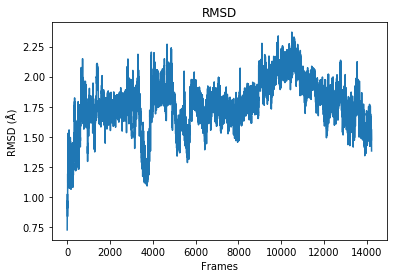

In [7]:
plt.plot(rmsd_dict.keys(), rmsd_dict.values())
#plt.ylim(0,2.5)
#plt.legend()
plt.title("RMSD")
plt.xlabel("Frames")
plt.ylabel("RMSD (Å)")
#plt.savefig("rmsd_deprot.png")
plt.show()

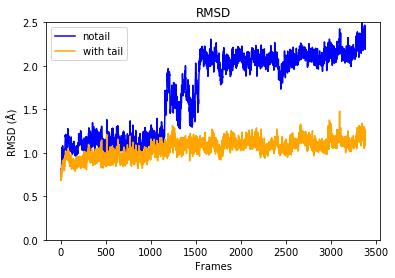

In [37]:
plt.plot(rmsd_dict2.keys(), rmsd_dict2.values(), color = "blue", label = "notail")
plt.plot(rmsd_dict.keys(), rmsd_dict.values(), color = "orange", label = "with tail")
plt.ylim(0,2.5)
plt.legend()
plt.title("RMSD")
plt.xlabel("Frames")
plt.ylabel("RMSD (Å)")
#plt.savefig("rmsd_deprot.png")
plt.show()